In [2]:
from leecarter import leecarter
import pandas as pd

import numpy as np
import numpy.matlib
from matplotlib import pyplot as plt

In [3]:
mortality = pd.read_csv('death_rates2.txt',delim_whitespace=True)
mortality = mortality[mortality['Age'] != '110+']
mortality['Age'] = mortality['Age'].astype(int)
mortality['Year'] = mortality['Year'].astype(int)
mortality = mortality[mortality['Age'] <= 100]
mortality['Female_l'] = np.log(mortality['Female'].astype(float))
mortality['Male_l'] = np.log(mortality['Male'].astype(float))
mortality['Total_l'] = np.log(mortality['Total'].astype(float))
mortality = mortality[['Year', 'Age', 'Female_l', 'Male_l', 'Total_l']]
mortality

,Year,Age,Female_l,Male_l,Total_l
0,1958,0,-2.723920,-2.480397,-2.591788
1,1958,1,-5.352562,-5.291540,-5.320972
2,1958,2,-6.357324,-6.197751,-6.272237
3,1958,3,-6.732962,-6.527266,-6.622576
4,1958,4,-7.066751,-6.837297,-6.943382
...,...,...,...,...,...
6867,2019,96,-1.240243,-1.143835,-1.220129
6868,2019,97,-1.123130,-1.046502,-1.108135
6869,2019,98,-1.127061,-0.963167,-1.093425
6870,2019,99,-0.980088,-0.864780,-0.957410


In [4]:
# train test split

In [5]:
fm = mortality.pivot(index="Age", columns="Year", values='Female_l')
fm_train = fm.iloc[:,0:round(np.shape(fm)[1]*2/3)]
fm_cross_val = fm.iloc[:,round(np.shape(fm)[1]*2/3):]
fm_cross_val

Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Age,,,,,,,,,,,,,,,,,,,,,
0,-4.843174,-4.921252,-4.990539,-5.015246,-5.069112,-5.102586,-5.149553,-5.250099,-5.242126,-5.282838,...,-5.429110,-5.478641,-5.458017,-5.480079,-5.512501,-5.613302,-5.608654,-5.605114,-5.652424,-5.607836
1,-7.557843,-7.643810,-7.627246,-7.721941,-7.986565,-7.915613,-7.893932,-7.902008,-8.056609,-7.977780,...,-8.108400,-8.177156,-8.403865,-8.170064,-8.149084,-8.173603,-8.368773,-8.330714,-8.507243,-8.426439
2,-8.050319,-8.390561,-8.302082,-8.266434,-8.426439,-8.679712,-8.209708,-8.195110,-8.595155,-8.399410,...,-8.563237,-8.798231,-8.940313,-8.818298,-8.697517,-8.825078,-8.740337,-8.932709,-8.746606,-9.036387
3,-8.206039,-8.512206,-8.314252,-8.752916,-8.881037,-8.679712,-8.468403,-8.622554,-8.600575,-8.685612,...,-8.910236,-8.791630,-9.044826,-8.873868,-8.662219,-9.326874,-9.349602,-9.220391,-9.061920,-9.282911
4,-8.449535,-8.517193,-8.940313,-8.547652,-8.852666,-8.611504,-8.859684,-8.709565,-8.622554,-8.628125,...,-8.895530,-8.987197,-9.133379,-8.971323,-9.408791,-9.190538,-9.672376,-9.408791,-9.220391,-9.338174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,-0.998260,-1.033342,-1.040172,-1.126577,-1.004456,-1.065000,-1.031281,-1.166703,-1.111853,-1.070824,...,-1.099048,-1.068254,-1.203013,-1.114105,-1.254789,-1.233072,-1.149841,-1.238654,-1.178698,-1.240243
97,-0.886390,-0.990468,-0.985196,-1.037349,-1.019592,-1.018013,-1.001644,-1.068789,-0.993906,-1.087402,...,-0.983176,-1.106997,-1.027253,-1.089074,-1.106607,-1.070538,-1.218437,-1.043954,-1.144139,-1.123130
98,-0.899704,-0.913220,-0.865408,-0.882230,-0.923388,-0.971045,-0.978227,-0.939869,-0.899171,-0.966201,...,-0.905155,-0.999246,-0.983152,-0.943731,-1.127864,-1.027605,-1.037270,-1.065322,-0.978714,-1.127061


In [6]:
# zmiana z fm na fm_train
fm = fm_train

In [7]:
fm = fm.to_numpy()

In [8]:
a_x = fm.mean(axis=1)
a_x

array([-3.72811038, -6.5983698 , -7.26181589, -7.60755221, -7.80696055,
       -7.96837405, -8.03595265, -8.14930563, -8.18527256, -8.3270924 ,
       -8.37625935, -8.41267133, -8.35984227, -8.31844372, -8.16710568,
       -7.99940385, -7.91921401, -7.80552824, -7.71309826, -7.6617899 ,
       -7.6683694 , -7.62161841, -7.60506201, -7.60838818, -7.53388377,
       -7.50793832, -7.47337623, -7.38743   , -7.31962684, -7.27579685,
       -7.18992445, -7.12098517, -7.05442611, -6.95853649, -6.86994498,
       -6.79289413, -6.69066366, -6.62927429, -6.52156173, -6.42211741,
       -6.32830619, -6.24773159, -6.17283834, -6.06835008, -5.9758391 ,
       -5.89109024, -5.80106142, -5.71607769, -5.63393178, -5.52715325,
       -5.4545779 , -5.367013  , -5.28563428, -5.20841119, -5.13390393,
       -5.04221472, -4.9594328 , -4.86873625, -4.77763816, -4.67433716,
       -4.55855517, -4.48271236, -4.38548562, -4.28343271, -4.18726179,
       -4.07923743, -3.97294129, -3.85880091, -3.75401251, -3.63

In [9]:
N = np.shape(fm)[0]
T = np.shape(fm)[1]
z_xt = fm - np.matlib.repmat(a_x, T, 1).T

In [10]:
U, S, V = np.linalg.svd(z_xt, full_matrices=True)

In [11]:
bxkt = S[0] * np.dot(U[:, 0].reshape(N, 1), V[0, :].reshape(T, 1).T)
eps = z_xt - bxkt

logm_xt_lcfitted = bxkt + a_x.reshape(N, 1)

b_x = U[:, 0]/U[:, 0].sum()
k_t = V[0, :]*S[0]*U[:, 0].sum()
a_x = a_x + k_t.sum()*b_x
k_t = k_t - k_t.sum()


In [12]:
# teraz arima
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(k_t)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.392014
p-value: 0.586098


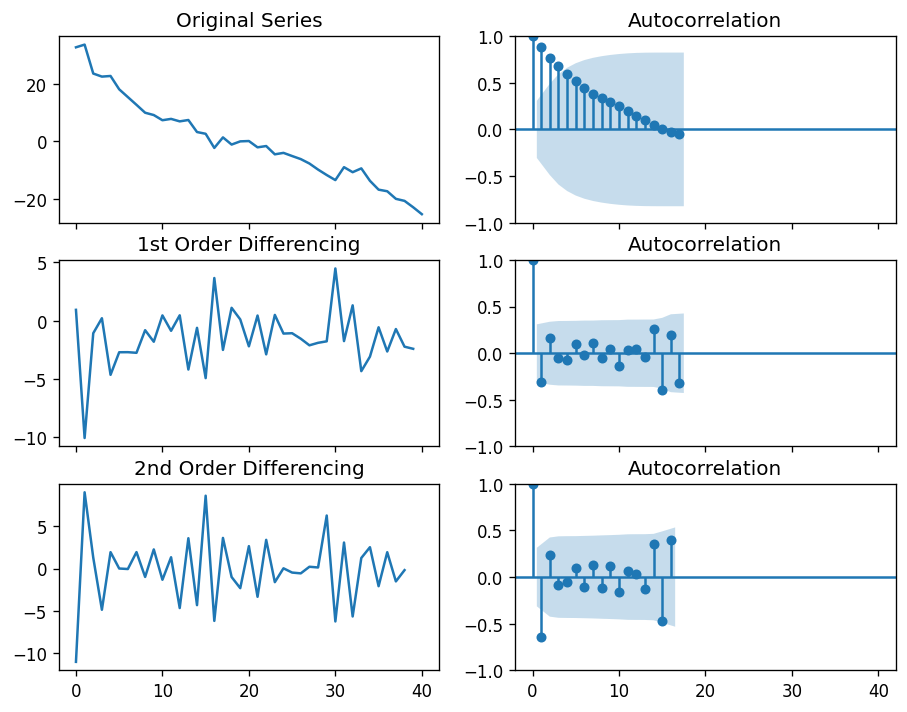

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(k_t); axes[0, 0].set_title('Original Series')
plot_acf(k_t, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(np.diff(k_t)); axes[1, 0].set_title('1st Order Differencing')
plot_acf(np.diff(k_t), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(np.diff(np.diff(k_t))); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.diff(np.diff(k_t)), ax=axes[2, 1])

plt.show()

In [14]:
from statsmodels.tsa.arima.model import ARIMA

In [30]:
# let's take 65 year old male
k_t

array([ 32.63904105,  33.57687672,  23.52255615,  22.45620578,
        22.67630441,  18.04235392,  15.34358453,  12.65084207,
         9.90401282,   9.09576938,   7.29903537,   7.76042326,
         6.90109208,   7.3718497 ,   3.19126842,   2.58563644,
        -2.3309823 ,   1.33629318,  -1.16189048,  -0.04948997,
         0.06725509,  -2.12486448,  -1.67587243,  -4.55371825,
        -4.04919289,  -5.1459337 ,  -6.21268023,  -7.7514082 ,
        -9.85556303, -11.74546687, -13.50688524,  -9.01858538,
       -10.76104749,  -9.43678196, -13.75712636, -16.83134327,
       -17.3884311 , -20.02276758, -20.73146881, -22.95218485,
       -25.3567155 ])

In [27]:
d = []
for a in range(5):
    for b in range(5):
        for c in range(5):
            mod = ARIMA(k_t, order=(a,b,c))
            res = mod.fit()
            d.append([res.llf, a, b, c])
print(max(d))

C:\Users\piotr\projekty\diffusion_processes_on_complex_networks\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\piotr\projekty\diffusion_processes_on_complex_networks\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\piotr\projekty\diffusion_processes_on_complex_networks\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\piotr\projekty\diffusion_processes_on_complex_networks\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive pa

[-85.58330520621512, 4, 2, 3]


In [31]:
mod = ARIMA(k_t, order=(4,2,3))
res = mod.fit()
print(res.summary())

pred = res.forecast(steps=20)
pred

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   41
Model:                 ARIMA(4, 2, 3)   Log Likelihood                 -85.583
Date:                Fri, 10 Jun 2022   AIC                            187.167
Time:                        13:30:36   BIC                            200.475
Sample:                             0   HQIC                           191.942
                                 - 41                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0124      0.373     -0.033      0.973      -0.743       0.718
ar.L2         -0.0906      0.213     -0.426      0.670      -0.508       0.327
ar.L3         -0.5726      0.120     -4.768      0.0

C:\Users\piotr\projekty\diffusion_processes_on_complex_networks\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


array([-28.97026425, -32.24440065, -34.55016702, -36.11078997,
       -37.33428215, -39.36039786, -42.33716167, -45.80982423,
       -48.90585645, -51.0000566 , -52.3626684 , -53.78299783,
       -56.03834055, -59.21779561, -62.6573915 , -65.50189408,
       -67.36698476, -68.66879597, -70.2718555 , -72.79238314])

In [17]:
a_x + b_x* pred

In [38]:
np.exp(a_x[64] + b_x[64]*pred)

array([0.0129992 , 0.01277259, 0.01261538, 0.01251007, 0.01242813,
       0.01229361, 0.01209861, 0.01187504, 0.01167919, 0.01154856,
       0.01146434, 0.01137721, 0.01124022, 0.0110499 , 0.01084763,
       0.01068315, 0.01057666, 0.01050296, 0.01041292, 0.01027289])